In [2]:
#Importing packages
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import pandas as pd
import numpy as np
from statsbombpy import sb

In [4]:
#Loading event data
df = sb.events(match_id='3889082')

#Loading xT grid used for threat calculations for each team
xt_grid_path = pd.read_csv('xT_Grid.csv')

#Loading football image for momentum graph
ball_image_path = 'ball.png'

/opt/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [6]:
xt_grid_path

,0.00638303,0.00779616,0.00844854,0.00977659,0.01126267,0.01248344,0.01473596,0.0174506,0.02122129,0.02756312,0.03485072,0.0379259
0,0.007501,0.008786,0.009424,0.010595,0.012147,0.013845,0.016118,0.018703,0.024015,0.029533,0.040670,0.046477
1,0.008880,0.009777,0.010013,0.011105,0.012692,0.014291,0.016856,0.019351,0.024122,0.028552,0.054911,0.064426
2,0.009411,0.010827,0.010165,0.011324,0.012626,0.014846,0.016895,0.019971,0.023851,0.035113,0.108051,0.257454
3,0.009411,0.010827,0.010165,0.011324,0.012626,0.014846,0.016895,0.019971,0.023851,0.035113,0.108051,0.257454
4,0.008880,0.009777,0.010013,0.011105,0.012692,0.014291,0.016856,0.019351,0.024122,0.028552,0.054911,0.064426
5,0.007501,0.008786,0.009424,0.010595,0.012147,0.013845,0.016118,0.018703,0.024015,0.029533,0.040670,0.046477
6,0.006383,0.007796,0.008449,0.009777,0.011263,0.012483,0.014736,0.017451,0.021221,0.027563,0.034851,0.037926


In [4]:
df.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 41212, 'lineup': [{'player': {'i...",Boca Juniors,1328,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",River Plate,1324,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Boca Juniors,1328,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,River Plate,1324,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Boca Juniors,1328,00:00:00.000,Half Start,NaN


In [8]:
#separate start and end locations from coordinates
df[['x', 'y']] = df['location'].apply(pd.Series)
df[['pass_end_x', 'pass_end_y']] = df['pass_end_location'].apply(pd.Series)
df[['carry_end_x', 'carry_end_y']] = df['carry_end_location'].apply(pd.Series)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [10]:
# Filter the dataframe to include only rows where 'type' is Shot, Pass, or Carry
df = df[df['type'].isin(['Shot', 'Pass', 'Carry', 'Ball Receipt*', 'Dribble', 'Duel', 'Ball Recovery', 'Block', 'Interception'])]

In [17]:
# Filter the DataFrame for 'Ball Receipt' or 'Ball Recovery' actions
filtered_df = df[df['type'].isin(['Ball Receipt*', 'Ball Recovery'])]

# Display the relevant columns to check if 'x' and 'y' coordinates exist
filtered_coordinates = filtered_df[['type', 'x', 'y']]

In [19]:
filtered_coordinates

,type,x,y
743,Ball Receipt*,59.9,42.6
744,Ball Receipt*,99.2,54.5
745,Ball Receipt*,41.9,25.8
746,Ball Receipt*,85.0,61.6
747,Ball Receipt*,52.9,7.3
...,...,...,...
2057,Ball Recovery,47.5,66.3
2058,Ball Recovery,83.5,58.8
2059,Ball Recovery,99.4,21.0
2060,Ball Recovery,95.3,9.7


In [11]:
df.team_id.unique()

array([1328, 1324])

In [11]:
df.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_recovery_failure', 'block_deflection', 'block_offensive',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_no_touch', 'dribble_nutmeg', 'dribble_outcome',
       'dribble_overrun', 'duel_outcome', 'duel_type', 'duration',
       'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_offensive', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_defl

In [9]:
df.shot_outcome.unique()

array([nan, 'Blocked', 'Saved', 'Off T', 'Goal'], dtype=object)

In [12]:
def plot_momentum_timeline_filled(df, ax, xt_grid_path='xT_grid.csv', ball_image_path=None):
    """
    Function to plot a momentum timeline based on xT changes over time for two teams,
    ensuring symmetrical goal markers, avoiding IndexError for extra-time goals, and adding goal minutes.
    """
    # Import the xT grid
    xT = pd.read_csv(xt_grid_path, header=None).to_numpy()
    xT_rows, xT_cols = xT.shape

    # Combine successful passes and all carries
    df_events = df.loc[
        ((df['type'] == 'Pass') & (df['pass_outcome'].isna())) |  # Only successful passes
        (df['type'] == 'Carry')  # Include all carries
    ]

    # Ensure coordinates are within bounds
    df_events = df_events[
        (df_events['x'] >= 0) & (df_events['x'] <= 120) &
        (df_events['y'] >= 0) & (df_events['y'] <= 80) &
        (df_events['pass_end_x'].notna() | df_events['carry_end_x'].notna())
    ]

    # Assign end_x and end_y dynamically based on type
    df_events['end_x'] = df_events.apply(
        lambda row: row['pass_end_x'] if row['type'] == 'Pass' else row['carry_end_x'], axis=1
    )
    df_events['end_y'] = df_events.apply(
        lambda row: row['pass_end_y'] if row['type'] == 'Pass' else row['carry_end_y'], axis=1
    )

    # Ensure end_x and end_y are within bounds
    df_events = df_events[
        (df_events['end_x'] >= 0) & (df_events['end_x'] <= 120) &
        (df_events['end_y'] >= 0) & (df_events['end_y'] <= 80)
    ]

    # Calculate bins for start and end points
    df_events['x1_bin'] = pd.cut(df_events['x'], bins=xT_cols, labels=False)
    df_events['y1_bin'] = pd.cut(df_events['y'], bins=xT_rows, labels=False)
    df_events['x2_bin'] = pd.cut(df_events['end_x'], bins=xT_cols, labels=False)
    df_events['y2_bin'] = pd.cut(df_events['end_y'], bins=xT_rows, labels=False)

    # Calculate xT for each event
    df_events['start_zone_value'] = df_events[['x1_bin', 'y1_bin']].apply(
        lambda x: xT[int(x[1])][int(x[0])] if not pd.isnull(x[0]) and not pd.isnull(x[1]) else 0, axis=1
    )
    df_events['end_zone_value'] = df_events[['x2_bin', 'y2_bin']].apply(
        lambda x: xT[int(x[1])][int(x[0])] if not pd.isnull(x[0]) and not pd.isnull(x[1]) else 0, axis=1
    )
    df_events['xT'] = df_events['end_zone_value'] - df_events['start_zone_value']

    # Dynamically identify the teams
    home_team_id, away_team_id = df['team_id'].unique()
    home_team_name = df[df['team_id'] == home_team_id]['team'].iloc[0]
    away_team_name = df[df['team_id'] == away_team_id]['team'].iloc[0]

    # Filter and calculate xT for both teams
    home_team_df = df_events[df_events['team_id'] == home_team_id][['minute', 'xT']]
    away_team_df = df_events[df_events['team_id'] == away_team_id][['minute', 'xT']]

    # Aggregate xT by minute
    home_team_df = home_team_df.groupby('minute')['xT'].sum().reset_index()
    away_team_df = away_team_df.groupby('minute')['xT'].sum().reset_index()

    # Merge the two DataFrames on 'minute' to align them
    merged_df = pd.merge(
        home_team_df.rename(columns={'xT': 'xT_home'}),
        away_team_df.rename(columns={'xT': 'xT_away'}),
        on='minute',
        how='outer'
    ).fillna(0).sort_values('minute')

    # Calculate momentum (difference in xT per minute)
    merged_df['momentum'] = merged_df['xT_home'] - merged_df['xT_away']

    # Extend timeline to 95 minutes if needed
    for extra_minute in range(91, 96):
        if extra_minute not in merged_df['minute'].values:
            merged_df = merged_df.append({'minute': extra_minute, 'xT_home': 0, 'xT_away': 0, 'momentum': 0}, ignore_index=True)

    # Filter for goals
    goals = df.loc[
        (df['type'] == 'Shot') & (df['shot_outcome'] == 'Goal')
    ][['minute', 'team', 'team_id']]

    # Define team colors
    home_team_color = '#001D4A'  # Home team
    away_team_color = '#BCC4CC'  # Away team

    # Plot the momentum timeline
    ax.fill_between(
        merged_df['minute'], 0, merged_df['momentum'],
        where=(merged_df['momentum'] > 0), interpolate=True, color=home_team_color, alpha=0.7, label=home_team_name
    )
    ax.fill_between(
        merged_df['minute'], 0, merged_df['momentum'],
        where=(merged_df['momentum'] < 0), interpolate=True, color=away_team_color, alpha=0.7, label=away_team_name
    )

    # Add symmetrical goal markers and minutes
    for _, row in goals.iterrows():
        goal_color = home_team_color if row['team_id'] == home_team_id else away_team_color
        minute = row['minute']
        y_offset = 0.3 if row['team_id'] == home_team_id else -0.3

        # Dashed line
        ax.plot([minute, minute], [0, y_offset], color='grey', linestyle='--', linewidth=1.2)

        # Ball marker
        if ball_image_path:  # Use custom ball image if provided
            ball_image = plt.imread(ball_image_path)
            imagebox = OffsetImage(ball_image, zoom=0.02, alpha=.7)
            ab = AnnotationBbox(imagebox, (minute, y_offset), frameon=False, zorder=5)
            ax.add_artist(ab)
        else:  # Use a circular marker
            ax.scatter(minute, y_offset, color=goal_color, edgecolor='black', s=150, zorder=5)

        # Add goal minute
        ax.text(
            minute, y_offset + 0.03 if y_offset > 0 else y_offset - 0.03,
            f"{minute}'", color='grey', fontsize=10, ha='center', zorder=6
        )

    # Set background color
    ax.set_facecolor('white')

    # Add halves separation line
    ax.axhline(0, color='grey', linestyle='--', linewidth=1)
    ax.set_facecolor('#F9F9F9')
    ax.set_xlabel('Minute', fontsize=10, fontweight='bold')
    ax.set_ylabel('Momentum (xT)', fontsize=10, fontweight='bold')
    ax.set_xlim(0, 95)
    ax.set_ylim(-0.35, 0.35)
    ax.legend(loc='upper left', fontsize=10, frameon=False)

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(False)

    # Remove ticks from the top and right sides
    ax.tick_params(top=False, right=False, left=True, bottom=False)
    ax.tick_params(axis='both', colors='grey')
    ax.set_xticks([0, 15, 30, 45, 60, 75, 90])  # Set x-axis ticks to every 15 minutes
    ax.set_yticks([])

    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_color('grey')


/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_62867/2868801245.py:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append({'minute': extra_minute, 'xT_home': 0, 'xT_away': 0, 'momentum': 0}, ignore_index=True)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_62867/2868801245.py:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append({'minute': extra_minute, 'xT_home': 0, 'xT_away': 0, 'momentum': 0}, ignore_index=True)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_62867/2868801245.py:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append({'minute': extra_minute, 'xT_home': 0, 'xT_away': 0, 'momentum': 0}, ignore_index=T

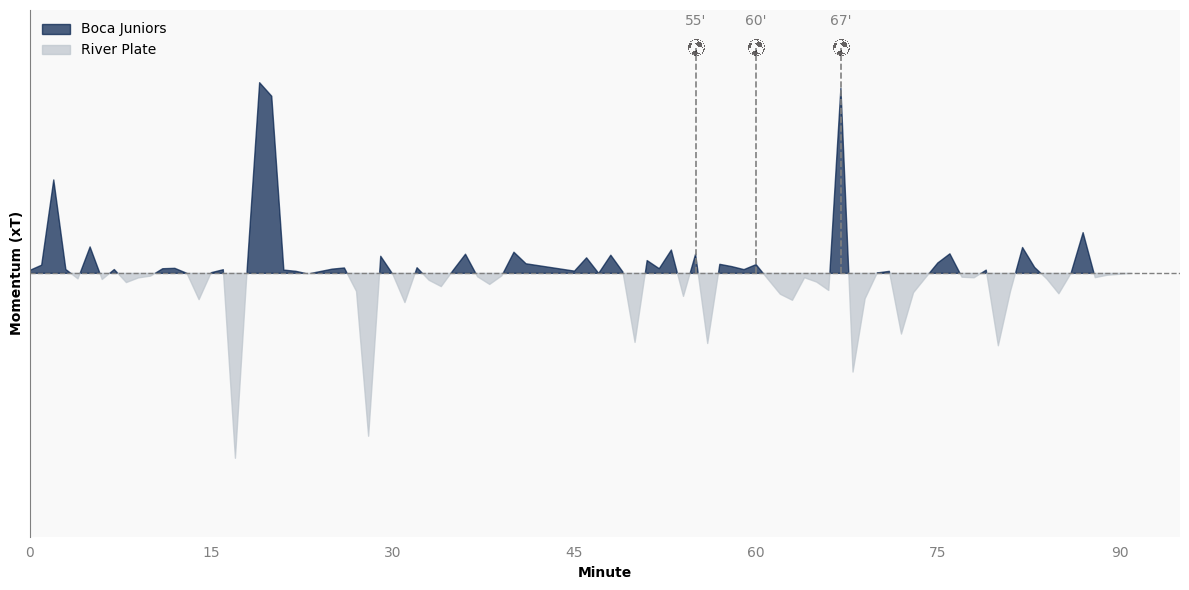

In [14]:
    # Create a figure and axis for the plot
fig, ax_momentum = plt.subplots(figsize=(12, 6))

# Call the function to plot the momentum timeline
plot_momentum_timeline_filled(
    df,  # Your dataframe with the events
    ax=ax_momentum, 
    xt_grid_path='xT_grid.csv',  # Path to the xT grid file
    ball_image_path='ball.png'  # Optional: path to a ball image (or None)
)

# Show the plot
plt.tight_layout()
plt.show()

In [16]:
fig.savefig('/Users/Trymso/Desktop/mome.png', dpi=300, bbox_inches='tight')

/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_31625/2852124555.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append({'minute': extra_minute, 'xT_home': 0, 'xT_away': 0, 'xG_home': 0, 'xG_away': 0, 'momentum': 0}, ignore_index=True)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_31625/2852124555.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append({'minute': extra_minute, 'xT_home': 0, 'xT_away': 0, 'xG_home': 0, 'xG_away': 0, 'momentum': 0}, ignore_index=True)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_31625/2852124555.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append({'minute': extra_minute, 'x

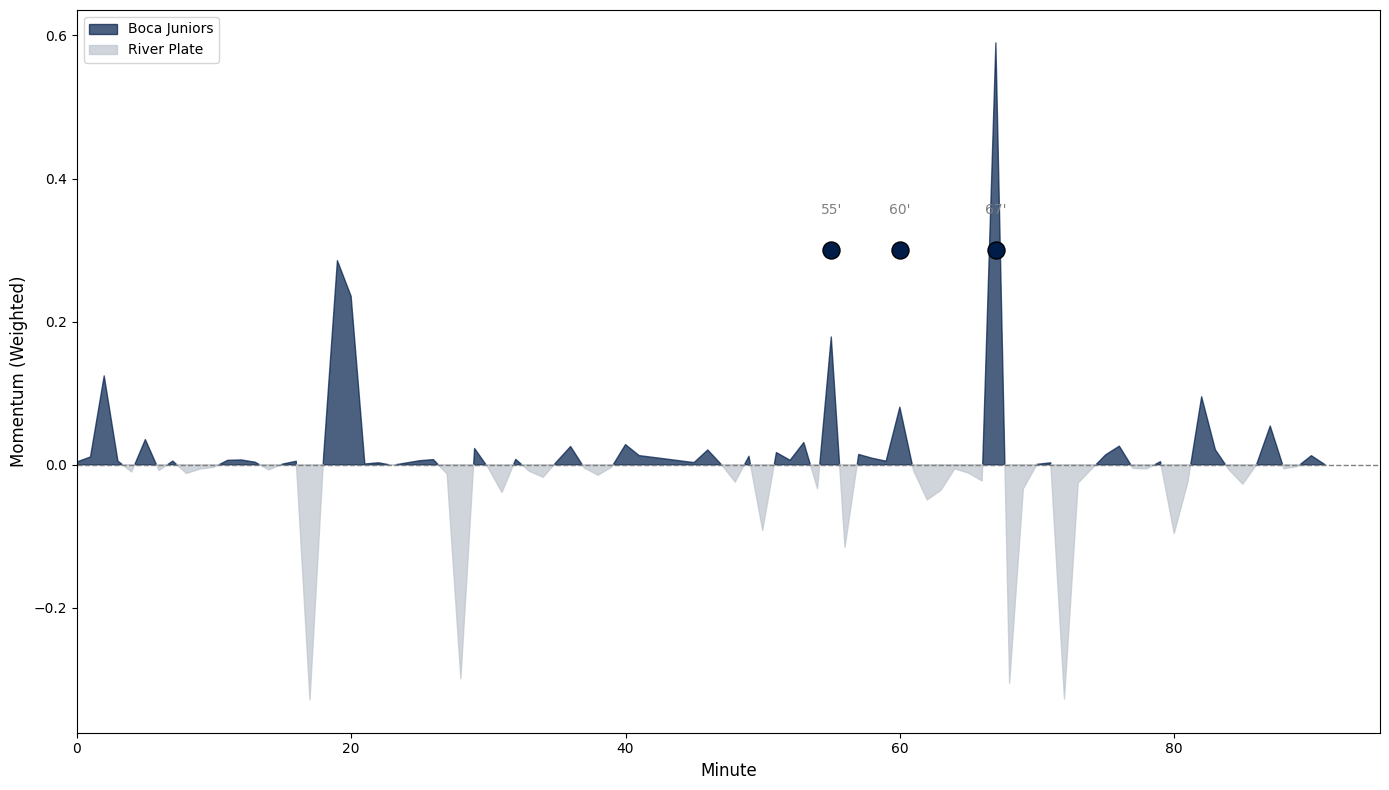

In [19]:
def plot_momentum_timeline_custom(df, ax, xt_grid_path='xT_grid.csv', ball_image_path=None):
    """
    Function to plot a momentum timeline with a custom weighting model for xT, xG, and shots.
    """
    # Import the xT grid
    xT = pd.read_csv(xt_grid_path, header=None).to_numpy()
    xT_rows, xT_cols = xT.shape

    # Combine successful passes and all carries
    df_events = df.loc[
        ((df['type'] == 'Pass') & (df['pass_outcome'].isna())) |  # Only successful passes
        (df['type'] == 'Carry')  # Include all carries
    ]

    # Ensure coordinates are within bounds
    df_events = df_events[
        (df_events['x'] >= 0) & (df_events['x'] <= 120) &
        (df_events['y'] >= 0) & (df_events['y'] <= 80) &
        (df_events['pass_end_x'].notna() | df_events['carry_end_x'].notna())
    ]

    # Assign end_x and end_y dynamically based on type
    df_events['end_x'] = df_events.apply(
        lambda row: row['pass_end_x'] if row['type'] == 'Pass' else row['carry_end_x'], axis=1
    )
    df_events['end_y'] = df_events.apply(
        lambda row: row['pass_end_y'] if row['type'] == 'Pass' else row['carry_end_y'], axis=1
    )

    # Calculate bins for start and end points
    df_events['x1_bin'] = pd.cut(df_events['x'], bins=xT_cols, labels=False)
    df_events['y1_bin'] = pd.cut(df_events['y'], bins=xT_rows, labels=False)
    df_events['x2_bin'] = pd.cut(df_events['end_x'], bins=xT_cols, labels=False)
    df_events['y2_bin'] = pd.cut(df_events['end_y'], bins=xT_rows, labels=False)

    # Calculate xT for each event
    df_events['start_zone_value'] = df_events[['x1_bin', 'y1_bin']].apply(
        lambda x: xT[int(x[1])][int(x[0])] if not pd.isnull(x[0]) and not pd.isnull(x[1]) else 0, axis=1
    )
    df_events['end_zone_value'] = df_events[['x2_bin', 'y2_bin']].apply(
        lambda x: xT[int(x[1])][int(x[0])] if not pd.isnull(x[0]) and not pd.isnull(x[1]) else 0, axis=1
    )
    df_events['xT'] = df_events['end_zone_value'] - df_events['start_zone_value']

    # Dynamically identify the teams
    home_team_id, away_team_id = df['team_id'].unique()
    home_team_name = df[df['team_id'] == home_team_id]['team'].iloc[0]
    away_team_name = df[df['team_id'] == away_team_id]['team'].iloc[0]

    # Aggregate xT by minute for each team
    home_xT = df_events[df_events['team_id'] == home_team_id].groupby('minute')['xT'].sum().reset_index()
    away_xT = df_events[df_events['team_id'] == away_team_id].groupby('minute')['xT'].sum().reset_index()

    # Aggregate shots and xG by minute for each team
    df_shots = df.loc[df['type'] == 'Shot', ['minute', 'team_id', 'shot_statsbomb_xg']]
    home_shots = df_shots[df_shots['team_id'] == home_team_id].groupby('minute')['shot_statsbomb_xg'].sum().reset_index()
    away_shots = df_shots[df_shots['team_id'] == away_team_id].groupby('minute')['shot_statsbomb_xg'].sum().reset_index()

    # Merge xT and shots/xG into a single DataFrame
    merged_df = pd.merge(
        home_xT.rename(columns={'xT': 'xT_home'}),
        away_xT.rename(columns={'xT': 'xT_away'}),
        on='minute',
        how='outer'
    ).merge(
        home_shots.rename(columns={'shot_statsbomb_xg': 'xG_home'}),
        on='minute',
        how='outer'
    ).merge(
        away_shots.rename(columns={'shot_statsbomb_xg': 'xG_away'}),
        on='minute',
        how='outer'
    ).fillna(0).sort_values('minute')

    # Apply the custom weighting for momentum
    merged_df['momentum'] = (
        1.0 * (merged_df['xT_home'] - merged_df['xT_away']) +  # Weight for xT
        0.5 * (merged_df['xG_home'] - merged_df['xG_away'])    # Weight for xG
    )

    # Extend timeline to 95 minutes if needed
    for extra_minute in range(91, 96):
        if extra_minute not in merged_df['minute'].values:
            merged_df = merged_df.append({'minute': extra_minute, 'xT_home': 0, 'xT_away': 0, 'xG_home': 0, 'xG_away': 0, 'momentum': 0}, ignore_index=True)

    # Filter for goals
    goals = df.loc[
        (df['type'] == 'Shot') & (df['shot_outcome'] == 'Goal')
    ][['minute', 'team', 'team_id']]

    # Define team colors
    home_team_color = '#001D4A'  # Home team
    away_team_color = '#BCC4CC'  # Away team

    # Plot the momentum timeline
    ax.fill_between(
        merged_df['minute'], 0, merged_df['momentum'],
        where=(merged_df['momentum'] > 0), interpolate=True, color=home_team_color, alpha=0.7, label=home_team_name
    )
    ax.fill_between(
        merged_df['minute'], 0, merged_df['momentum'],
        where=(merged_df['momentum'] < 0), interpolate=True, color=away_team_color, alpha=0.7, label=away_team_name
    )

    # Add goal markers
    for _, row in goals.iterrows():
        goal_color = home_team_color if row['team_id'] == home_team_id else away_team_color
        minute = row['minute']
        y_offset = 0.3 if row['team_id'] == home_team_id else -0.3
        ax.scatter(minute, y_offset, color=goal_color, edgecolor='black', s=150, zorder=5)
        ax.text(minute, y_offset + 0.05 if y_offset > 0 else y_offset - 0.05, f"{minute}'", color='grey', ha='center', zorder=6)

    # Add plot styles
    ax.axhline(0, color='grey', linestyle='--', linewidth=1)
    ax.set_xlim(0, 95)
    ax.set_xlabel('Minute', fontsize=12)
    ax.set_ylabel('Momentum (Weighted)', fontsize=12)
    ax.legend(loc='upper left', fontsize=10)
    ax.set_facecolor('white')

# Example usage
fig, ax = plt.subplots(figsize=(14, 8))
plot_momentum_timeline_custom(df, ax=ax, xt_grid_path='xT_grid.csv', ball_image_path='ball.png')
plt.tight_layout()
plt.show()


# Calculating xT for Players

/opt/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_63559/1845580690.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boca_df['end_x'] = boca_df.apply(
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_63559/1845580690.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boca_df['end_y'] = boca_df.apply(
/var/folders/dv/7l2p8f4j2gb

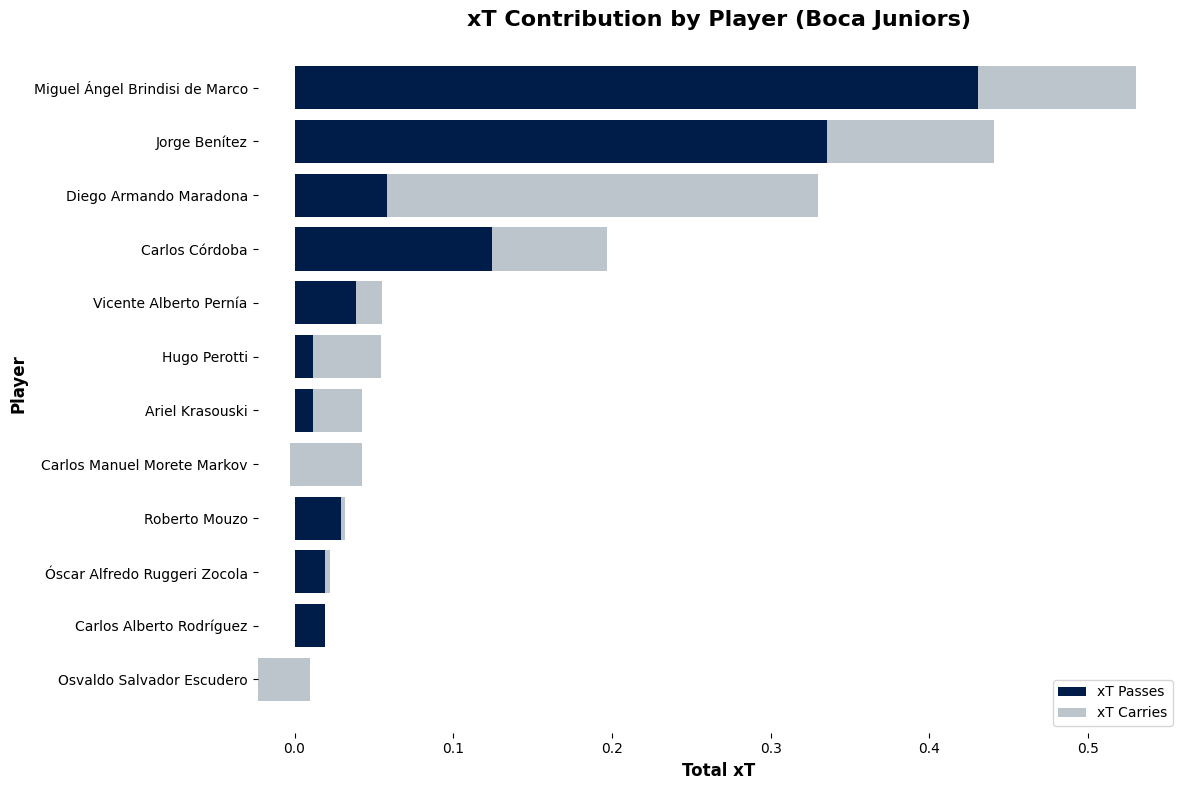

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsbombpy import sb

# Load event data
df = sb.events(match_id='3889082')

# Load xT grid used for threat calculations
xT = pd.read_csv('xT_grid.csv', header=None).to_numpy()
xT_rows, xT_cols = xT.shape

# Separate start and end locations for passes and carries
df[['x', 'y']] = df['location'].apply(pd.Series)
df[['pass_end_x', 'pass_end_y']] = df['pass_end_location'].apply(pd.Series)
df[['carry_end_x', 'carry_end_y']] = df['carry_end_location'].apply(pd.Series)

# Filter for Boca Juniors and relevant events (Passes and Carries)
boca_df = df[(df['team'] == 'Boca Juniors') & 
             (((df['type'] == 'Pass') & (df['pass_outcome'].isna())) | 
              (df['type'] == 'Carry'))]

# Assign end_x and end_y dynamically based on event type
boca_df['end_x'] = boca_df.apply(
    lambda row: row['pass_end_x'] if row['type'] == 'Pass' else row['carry_end_x'], axis=1
)
boca_df['end_y'] = boca_df.apply(
    lambda row: row['pass_end_y'] if row['type'] == 'Pass' else row['carry_end_y'], axis=1
)

# Calculate xT bins for start and end locations
boca_df['x1_bin'] = pd.cut(boca_df['x'], bins=xT_cols, labels=False)
boca_df['y1_bin'] = pd.cut(boca_df['y'], bins=xT_rows, labels=False)
boca_df['x2_bin'] = pd.cut(boca_df['end_x'], bins=xT_cols, labels=False)
boca_df['y2_bin'] = pd.cut(boca_df['end_y'], bins=xT_rows, labels=False)

# Calculate start and end zone xT values
boca_df['start_zone_value'] = boca_df[['x1_bin', 'y1_bin']].apply(
    lambda x: xT[int(x[1])][int(x[0])] if not pd.isnull(x[0]) and not pd.isnull(x[1]) else 0, axis=1
)
boca_df['end_zone_value'] = boca_df[['x2_bin', 'y2_bin']].apply(
    lambda x: xT[int(x[1])][int(x[0])] if not pd.isnull(x[0]) and not pd.isnull(x[1]) else 0, axis=1
)

# Calculate xT for each event
boca_df['xT'] = boca_df['end_zone_value'] - boca_df['start_zone_value']

# Separate xT contributions for Passes and Carries
xT_passes = boca_df[boca_df['type'] == 'Pass'].groupby('player')['xT'].sum().reset_index()
xT_passes.rename(columns={'xT': 'xT_Passes'}, inplace=True)

xT_carries = boca_df[boca_df['type'] == 'Carry'].groupby('player')['xT'].sum().reset_index()
xT_carries.rename(columns={'xT': 'xT_Carries'}, inplace=True)

# Merge Passes and Carries xT for each player
player_xT = pd.merge(xT_passes, xT_carries, on='player', how='outer').fillna(0)
player_xT['Total_xT'] = player_xT['xT_Passes'] + player_xT['xT_Carries']

# Sort by total xT (highest to lowest)
player_xT = player_xT.sort_values('Total_xT', ascending=False)

# Plot the bar chart with horizontal bars
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Pass and Carry xT as stacked horizontal bars
ax.barh(player_xT['player'], player_xT['xT_Passes'], label='xT Passes', color='#001D4A')
ax.barh(player_xT['player'], player_xT['xT_Carries'], label='xT Carries', left=player_xT['xT_Passes'], color='#BCC4CC')

# Customize the chart
ax.set_title('xT Contribution by Player (Boca Juniors)', fontsize=16, fontweight='bold')
ax.set_xlabel('Total xT', fontsize=12, fontweight='bold')
ax.set_ylabel('Player', fontsize=12, fontweight='bold')

# Reverse the order of players (highest total xT at the top)
ax.invert_yaxis()

# Add legend
ax.legend()

# Remove spines and show the plot
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


In [3]:
fig.savefig('/Users/Trymso/Desktop/xtm.png', dpi=300, bbox_inches='tight')